IndexError: index 30 is out of bounds for axis 1 with size 30

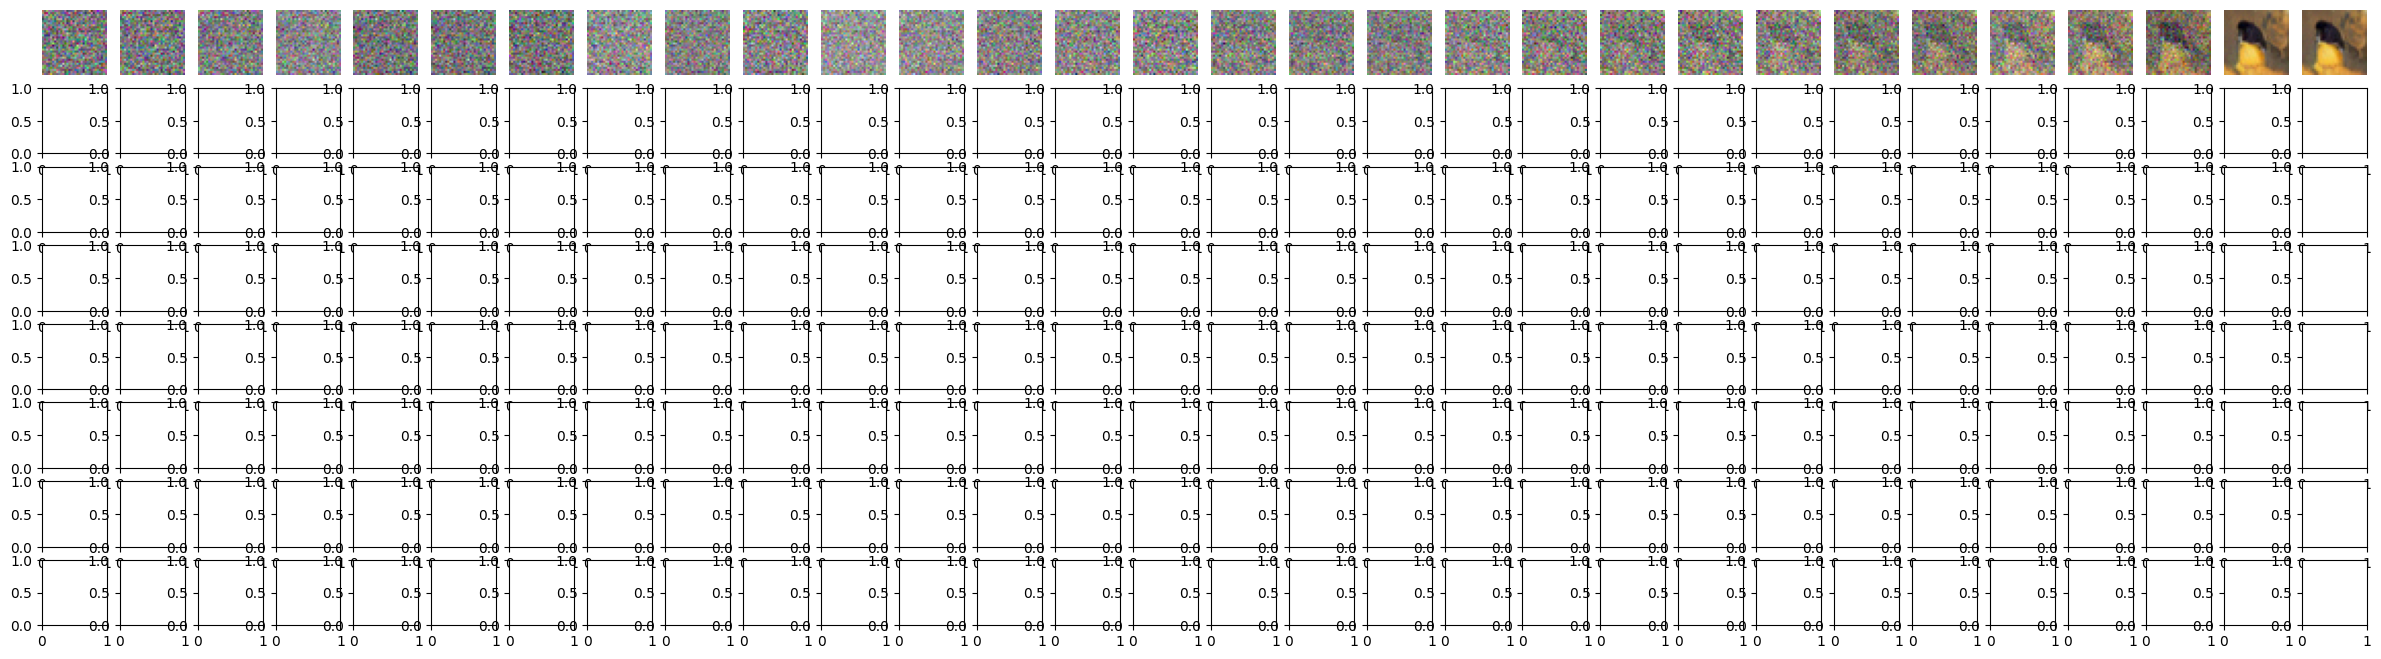

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import numpy as np

# Correct path to the data folder
data_folder = Path("/opt/diffusion/data_dumps/samples/cifar10/WrappedUNetModel-bs128-abs128-llr-4.8-emaTrue-2024-02-17-10-39-45-last-model/15")

# Parameter for the number of columns in the final image (can be changed by the user)
num_columns = 30  # User can modify this value as needed

def logarithmic_scale_indices(total, num_samples):
    indices = np.logspace(np.log10(total - 1), 0, num=num_samples, dtype=int)
    # We reverse the indices to start from the end (which is the noise image) to the beginning (final image)
    return sorted(set(total - 1 - indices))


# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    
    # indices = np.array([indx for indx in range(999, -1, -int(1000 / num_columns))])
    # indices[-3:] = np.array([indx for indx in range(2, -1, -1)])
    
    # logaritmic scale from 999 to 0
    indices = logarithmic_scale_indices(1000, num_columns)

    
    
    
    for i in indices:
        file_path = folder / f'output_{i}.png'
        if file_path.is_file():
            images.append(mpimg.imread(file_path))
    return images

# Collect all images from iter_num folders
all_images = []
for iter_folder in sorted(data_folder.glob('iter_num*')):
    iter_images = load_images_from_folder(iter_folder)
    all_images.append(iter_images)

# The number of rows is equal to the number of iter_num folders
num_rows = len(all_images)

# Check if we have any rows to plot
if num_rows > 0:
    # Create the final plot
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns, num_rows))

    for row, iter_images in enumerate(all_images):
        for col, img in enumerate(iter_images):
            if num_rows > 1:
                # If more than one row, we need to index the subplot as [row, col]
                axes[row, col].imshow(img)
                axes[row, col].axis('off')  # Hide axes
            else:
                # If only one row, we index as [col] since axes will be 1D
                axes[col].imshow(img)
                axes[col].axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the specified folder. Please check the file paths.")
